# RNN・LSTM(Keras)

In [1]:
import numpy as np
import tensorflow
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set()

## データ生成

In [2]:
# sin曲線+ノイズ
ts = np.linspace(0, 10 * np.pi, 500)
ys = np.sin(ts) + np.random.normal(scale=0.1, size=len(ts))

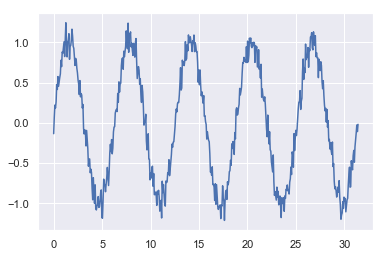

In [3]:
plt.plot(ts, ys)

In [4]:
# 学習設定
batch_size = 32    # ミニバッチサイズ
n_steps = 50       # 入力系列の長さ
input_size = 1     # 入力の次元
hidden_size = 50   #  中間層の次元
output_size = 1    # 出力層の次元

lr = 0.005         # 学習率(SGD)
n_iter = 300       # イテレーション回数

In [5]:
# 訓練データとテストデータに分割
train_ratio = 0.8
data = []
for i in range(len(ys) - n_steps - 1):
    data.append(ys[i: i+n_steps+1])
data = np.array(data, dtype=np.float32)
n_train = int(train_ratio * len(data))
x_train, y_train = np.split(data[:n_train], [-1], axis=1)
x_test, y_test = np.split(data[n_train:], [-1], axis=1)

x_train = np.reshape(x_train, [-1, n_steps, input_size])
x_test = np.reshape(x_test, [-1, n_steps, input_size])

## モデル構築

In [6]:
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.optimizers import Adam, SGD

model = Sequential()  
model.add(SimpleRNN(hidden_size))
# model.add(LSTM(hidden_size))
model.add(Dense(output_size))

# 損失関数と最適化手法を設定
model.compile(loss=mean_squared_error,
                          optimizer=Adam()
#                           optimizer=SGD(lr)
                          )

## 学習

In [7]:
epochs = int(n_iter * batch_size / len(x_train))
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs) 

Epoch 1/26
359/359 [==============================] - 1s 2ms/step - loss: 0.1460
Epoch 2/26
359/359 [==============================] - 0s 511us/step - loss: 0.0327
Epoch 3/26
359/359 [==============================] - 0s 495us/step - loss: 0.0207
Epoch 4/26
359/359 [==============================] - 0s 541us/step - loss: 0.0154
Epoch 5/26
359/359 [==============================] - 0s 561us/step - loss: 0.0138
Epoch 6/26
359/359 [==============================] - 0s 523us/step - loss: 0.0126
Epoch 7/26
359/359 [==============================] - 0s 543us/step - loss: 0.0124
Epoch 8/26
359/359 [==============================] - 0s 606us/step - loss: 0.0121
Epoch 9/26
359/359 [==============================] - 0s 550us/step - loss: 0.0123
Epoch 10/26
359/359 [==============================] - 0s 534us/step - loss: 0.0127
Epoch 11/26
359/359 [==============================] - 0s 492us/step - loss: 0.0121
Epoch 12/26
359/359 [==============================] - 0s 473us/step - loss: 0.0120
Epo

## テスト

In [8]:
# テストデータに対する予測
prediction = model.predict(x_test)

# 1次元配列に
prediction = prediction.reshape(-1)
true_y = y_test.reshape(-1)

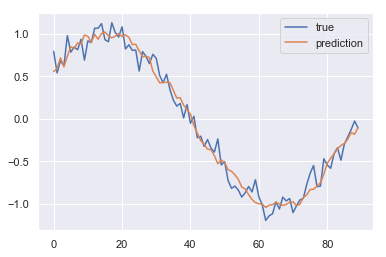

In [9]:
# テストデータに対する予測を可視化
xx = np.arange(len(prediction))
plt.plot(xx, true_y, label='true')
plt.plot(xx, prediction, label='prediction')
plt.legend()

## 再帰的な予測

In [10]:
# テストデータの最初のデータからスタートし、
# モデルの予測を利用し再帰的に予測
curr_x = x_test[0]
predicted = []
# 予測するステップ数
N = 200
for i in range(N):
    # 予測
    predicted.append(model.predict(curr_x[None]))
    # 入力を更新
    curr_x = np.insert(curr_x, n_steps, predicted[-1], axis=0)[1:]

# 1次元配列に
predicted = np.array(predicted).reshape(-1)

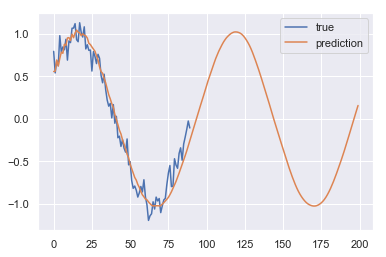

In [11]:
#再帰的な予測を可視化
plt.plot(xx, true_y, label='true')
plt.plot(np.arange(N), predicted, label='prediction')
plt.legend()